# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the datasets

In [3]:
df=pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Exploratory Data Analysis And Data Cleaning

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [4]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [ ]:
df.info()

In [ ]:
df.describe(include = "object")

In [ ]:
for col in df.describe(include = "object").columns:
    print(col)
    print(df[col].unique())
    print("_"*50)
    

In [ ]:
df.isnull().sum()

In [5]:
df.drop(["agent","company"],axis=1, inplace=True)
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [6]:
df=df[df["adr"]<5000]               # Remove extreme outliers
df = df[df["adr"].notna()]          # Remove missing ADR

In [ ]:
df.describe()

# Data Analysis And Visualization

is_canceled
0    0.629589
1    0.370411
Name: proportion, dtype: float64



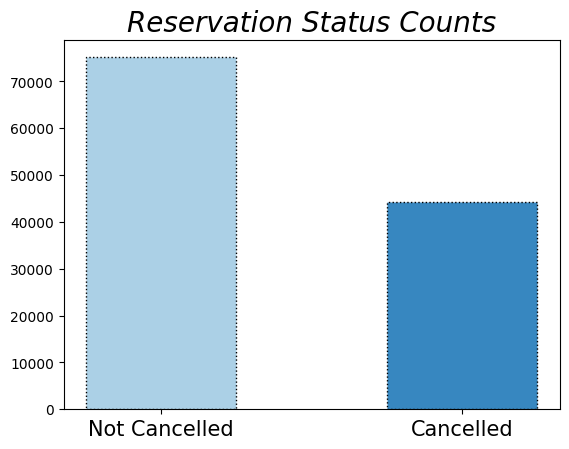

In [93]:
cancelled_perc=df["is_canceled"].value_counts(normalize=True)
print(cancelled_perc)

print()

blue_colors = sns.color_palette("Blues", 2)

plt.title("Reservation Status Counts",fontsize=20,fontstyle="oblique")
plt.xticks(fontsize=15)
plt.bar(["Not Cancelled","Cancelled"],df["is_canceled"].value_counts(), width=0.5,edgecolor="black",linestyle=":",color=blue_colors)
plt.show()

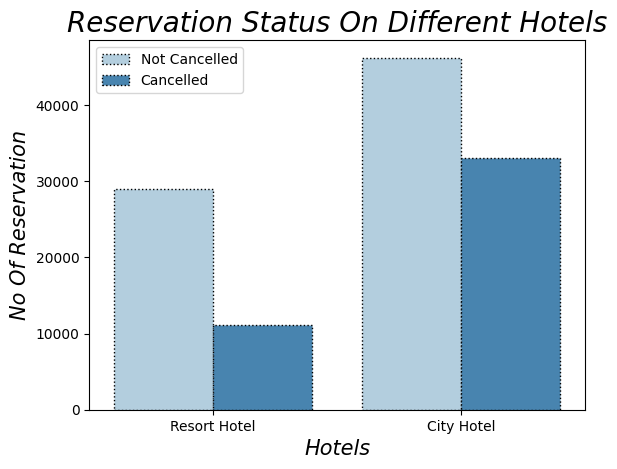

In [94]:
x=sns.countplot(x="hotel",hue="is_canceled", data=df, palette="Blues",edgecolor="black",linestyle=":")

plt.title("Reservation Status On Different Hotels",fontsize=20,fontstyle="oblique")
plt.xlabel("Hotels",fontsize=15,fontstyle="italic")
plt.ylabel("No Of Reservation",fontsize=15,fontstyle="italic")
plt.legend(["Not Cancelled","Cancelled"])
plt.show()

In [8]:
resort_hotel=df[df["hotel"] == "Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize= True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [9]:
city_hotel=df[df["hotel"] == "City Hotel"]
city_hotel["is_canceled"].value_counts(normalize= True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [10]:
resort_hotel= resort_hotel.groupby("reservation_status_date")[["adr"]].mean().reset_index()
city_hotel= city_hotel.groupby("reservation_status_date")[["adr"]].mean().reset_index()

In [ ]:
print(resort_hotel.columns)


In [11]:
resort_hotel["reservation_status_date"] = pd.to_datetime(resort_hotel["reservation_status_date"])
city_hotel["reservation_status_date"] = pd.to_datetime(city_hotel["reservation_status_date"])


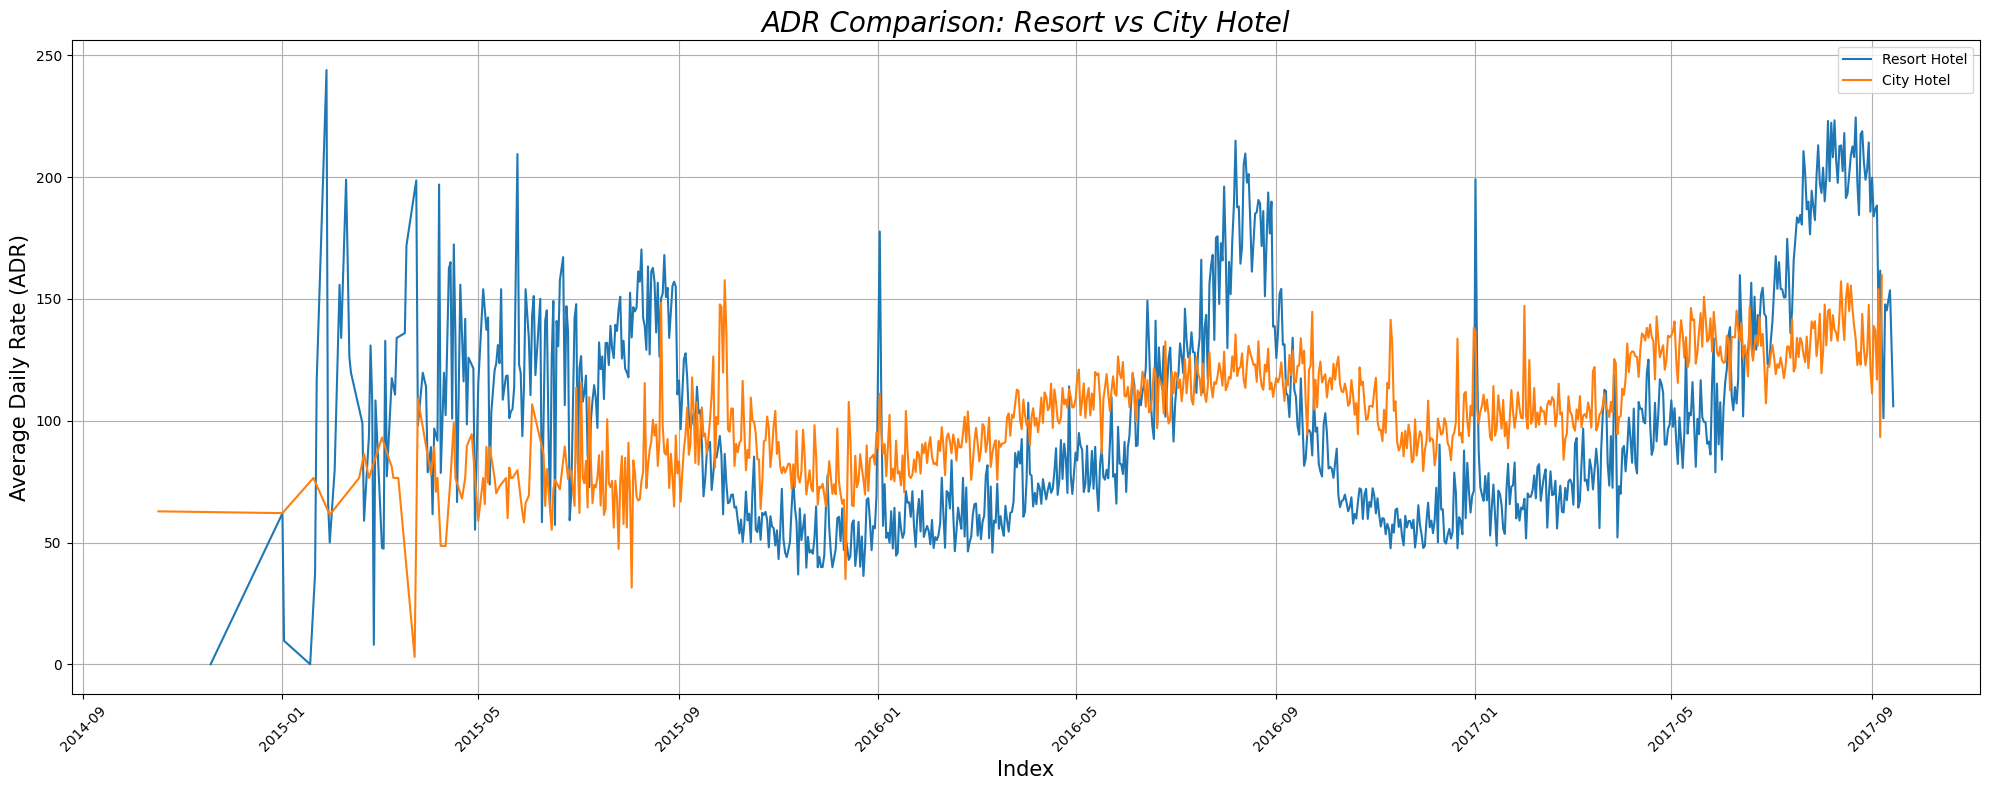

In [12]:
# resort_hotel= resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
# city_hotel= city_hotel.groupby("reservation_status_date")[["adr"]].mean()


plt.figure(figsize=(20,8))
plt.plot(resort_hotel["reservation_status_date"], resort_hotel["adr"],label="Resort Hotel")
plt.plot(city_hotel["reservation_status_date"], city_hotel["adr"],label="City Hotel")



plt.legend()
plt.xlabel("Index",fontsize=15)
plt.ylabel("Average Daily Rate (ADR)",fontsize=15)
plt.title("ADR Comparison: Resort vs City Hotel",fontsize=20,fontstyle="oblique")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

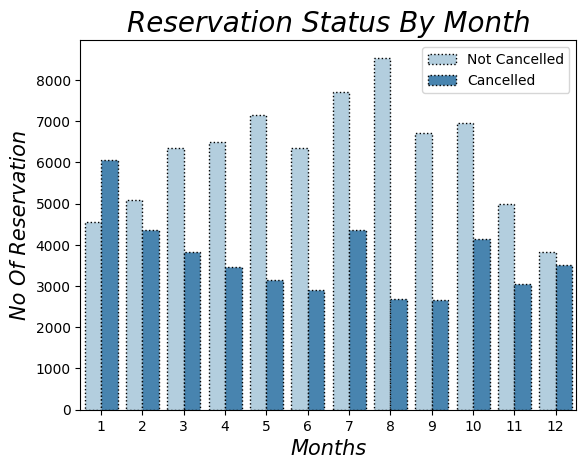

In [13]:
df["month"]=df["reservation_status_date"].dt.month

y=sns.countplot(x="month", hue="is_canceled", data =df,palette="Blues",edgecolor="black",linestyle=":")

plt.title("Reservation Status By Month",fontsize=20,fontstyle="oblique")
plt.xlabel("Months",fontsize=15,fontstyle="italic")
plt.ylabel("No Of Reservation",fontsize=15,fontstyle="italic")
plt.legend(["Not Cancelled","Cancelled"])
plt.show()

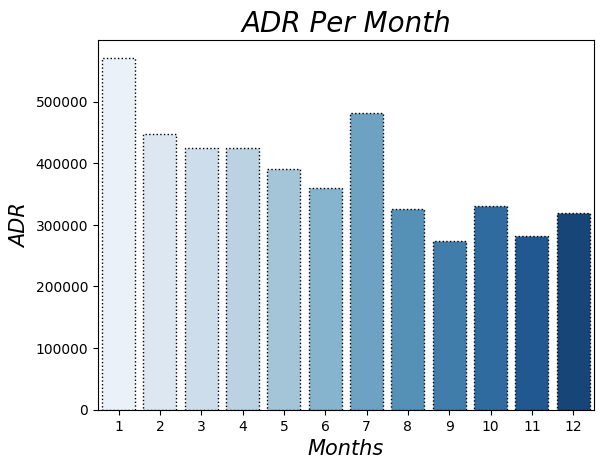

In [14]:
sns.barplot(x="month", y="adr", data = df[df["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index(),
            palette="Blues",edgecolor="black",linestyle=":")

plt.title("ADR Per Month",fontsize=20,fontstyle="oblique")
plt.xlabel("Months",fontsize=15,fontstyle="italic")
plt.ylabel("ADR",fontsize=15,fontstyle="italic")
plt.show()

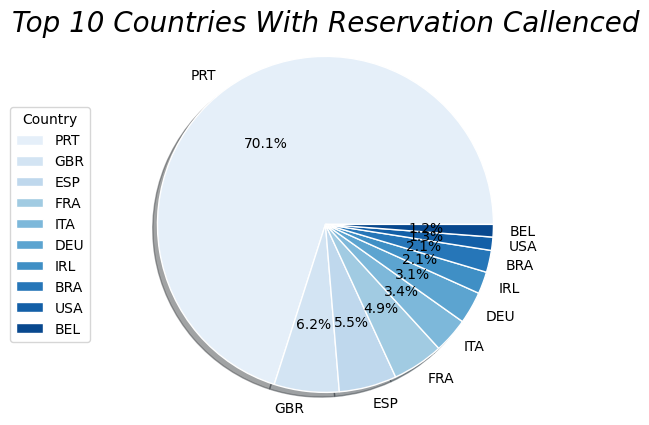

In [15]:
callenced_data=df[df["is_canceled"] == 1]
top_10_country=callenced_data["country"].value_counts()[:10]

colors = sns.color_palette("Blues", 10)
plt.pie(top_10_country,autopct="%1.1f%%", labels=top_10_country.index,colors=colors,shadow=True,
       textprops={'fontsize': 10, 'color': 'black'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1})

plt.title("Top 10 Countries With Reservation Callenced",fontsize=20,fontstyle="oblique")
plt.legend(title="Country",  loc="center left", bbox_to_anchor=(-0.15, 0.5))
plt.axis('equal')
plt.show()

In [ ]:
df["market_segment"].value_counts(normalize= True)


In [ ]:
callenced_data=df[df["is_canceled"] == 1]
callenced_data["market_segment"].value_counts(normalize= True)

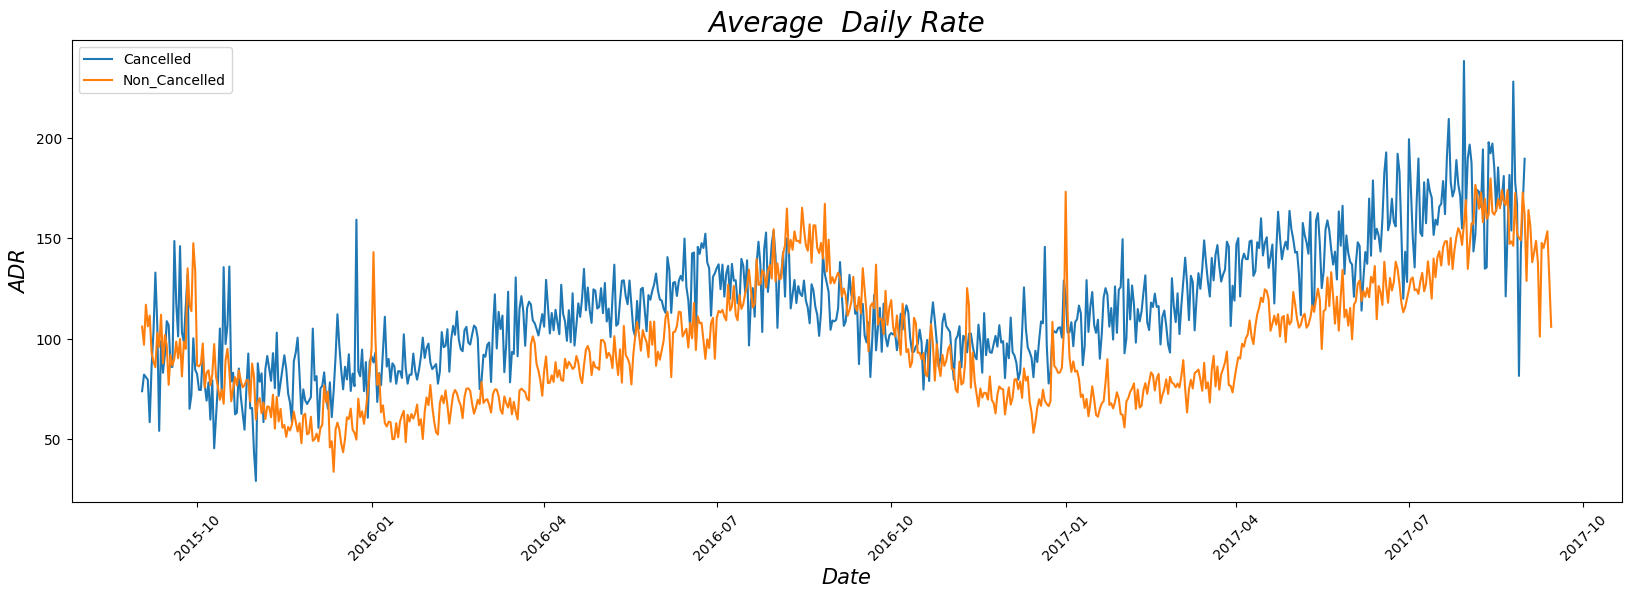

In [16]:
callenced_data=df[df["is_canceled"] == 1]
cancelled_data_adr=callenced_data.groupby("reservation_status_date")[["adr"]].mean().reset_index()
cancelled_data_adr.sort_values("reservation_status_date", inplace=True)
cancelled_data_adr=cancelled_data_adr[(cancelled_data_adr["reservation_status_date"] > "2015-9")]

non_callenced_data=df[df["is_canceled"] == 0]
non_cancelled_data_adr=non_callenced_data.groupby("reservation_status_date")[["adr"]].mean().reset_index()
non_cancelled_data_adr.sort_values("reservation_status_date", inplace=True)
non_cancelled_data_adr=non_cancelled_data_adr[(non_cancelled_data_adr["reservation_status_date"] > "2015-9")]



plt.figure(figsize=(20,6))
plt.plot(cancelled_data_adr["reservation_status_date"], cancelled_data_adr["adr"], label="Cancelled" )
plt.plot(non_cancelled_data_adr["reservation_status_date"], non_cancelled_data_adr["adr"], label="Non_Cancelled" )
plt.legend()
plt.title("Average  Daily Rate",fontsize=20,fontstyle="oblique")
plt.xlabel("Date",fontsize=15,fontstyle="italic")
plt.ylabel("ADR",fontsize=15,fontstyle="italic")
plt.xticks(rotation=45)
plt.show()
